*Tim Boudreau* <br>
*October 16 2017* <br>
*tim.boudreau25@gmail.com* 
***

# Phillies Baseball R&D Questionnaire

## Required Question


I would first build a model using over-time minor league batting statistics that are available, such as plate discipline, batting or pitching performance on thrown breaking pitches and fastballs, etc. as well as league-adjusted statistics, as each minor league has differing properties through ballpark differences. I would then compare the minor league statistics through the model of players who have had success at the majors to those who I would consider promoting. My initial thought as to what model I would use would be KMeans to cluster players, and see which clusters had many promoted players who succeeded in the majors. Minor leaguers in those clusters likely are close to being ready. After modeling, I would discuss the model results with scouts and coaches, to ask them if they believed these player(s) were ready or not. I do not know the weight I would put on model versus scouts, but I want to know both to have a well-informed decision – despite statistics, baseball players are still human, and receiving human input is valuable.

## Candidate's Choice Questions

### Question 1a:

This article (https://www.fangraphs.com/community/clustering-pitchers-with-pitchfx/), written by a community contributor, I found fascinating because it accomplished a goal of mine (grouping pitchers by pitch repertoire), taught me about a new area of statistical modeling (natural language processing) and was on a topic of interest (baseball). The author applied a natural language processing algorithm, Latent Dirichlet Allocation (LDA) to KMeans-clustered pitches to group pitchers by repertoire. I haven’t heard of LDA before, so I researched the algorithm to learn about it. I’ve tried to replicate the author’s process, but I am unsure of how to apply LDA to clustered pitch groups. Typically, LDA is applied to articles, creating subgroups of words based on topics.  

The author used the vertical and horizontal characteristics of pitch movement, pitch velocity and plate location from the 2014 MLB season to run KMeans with 500 clusters. From there, the author was able to classify every pitch thrown by a pitcher as from a specific cluster. The author used those clusters through LDA, declaring five “topics” for LDA to search through and group by, to group pitcher seasons from 2007 to 2014.

This study was insightful to me not only because of the results, pitchers clustered by similar repertoires, but also through the application of a non-statistical method on baseball statistics. The results were inspiring, as I’ve spent many hours trying to theorize how I could group pitchers by their “stuff” to try to use pitcher similarities in a value-adding way. I do not know enough about LDA to thoroughly evaluate the legitimacy of the author’s model, but the results are informative and I believe accurate. 


### Question 1b:

## Predicting Full-Season Slugging Percentage from Half-Season Data


Using March through June 2017 MLB batting data, I attempted to try to predict full season 2017 player slugging percentages. This can be useful in many ways, whether to evaluate current talent or other team talent.

The dataset I used contained March through June values for the following batting statistics: player name, number of plate appearances, number of at bats, batting average, slugging percentage, walk percentage, strike out percentage, batting average on balls in play, ground balls per fly ball ratio, line drive percentage, ground ball percentage, fly ball percentage and home runs per fly ball percentage. I validated the models with the players' full-season (through September 24th) slugging percentage.


** *note, results may change as the code is rerun, as the kernel is not set* ** 



### Data Management

In [23]:
%matplotlib inline

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
## import data and replace percentage signs in the data:

file_name = "Data/slugging.csv"
data = pd.read_csv(file_name)

cols = data.columns
data[cols] = data[cols].replace({'\%':''}, regex = True)

# source for the percentage regex code
# https://stackoverflow.com/questions/43096522/remove-dollar-sign-from-entire-python-pandas-dataframe


## select the data that I believe is relevant: remove name, PA and AB and convert rest to float

variables = data.columns[1:len(data.columns)-1]
data[variables] = data[variables].astype(float)


## select the data for analysis, to test in modeling

x = data[variables].values
y = data['FullSeason_SLG'].values

Here, I imported packages I needed and the data itself. Some of the columns in the dataset were in percent, so I removed the percentage sign before analyzing the data. I also removed the player names, as that doesn't have any impact unless I use histrical data as well.

### Model Implementation

In [3]:
## Use 2 models and compare


## Random Forest Set up

clf = RandomForestRegressor(n_jobs=2)     # classifier for forest


## Linear Regression Set up

train = np.random.randn(len(y)) < .8      # create training data for the model

lm = linear_model.LinearRegression()      # model for linear regression
reg = lm.fit(x[train], y[train])          # regression trained with training data


# Perform 6-fold cross validation
reg_scores = cross_val_score(reg, x, y, cv=6)
rf_scores = cross_val_score(clf, x, y, cv=6)

print "Cross-validation scores:\n", \
    "\nLinear Regression: ", reg_scores, \
    "\nRandom Forest: ", rf_scores
    

    
## Model Implementation! Stored in a dataframe, and with error measures (predict minus actual)
    
results = pd.DataFrame({'rf_predict' : cross_val_predict(clf, x, y, cv=6), "actual" : y})
results['reg_predict'] = cross_val_predict(reg, x, y, cv=6)

results['rf_overpredict'] = results['rf_predict'] - results['actual']
results['reg_overpredict'] = results['reg_predict'] - results['actual']

Cross-validation scores:

Linear Regression:  [ 0.56937449  0.77858526  0.79617649  0.62409938  0.65574534  0.73929912] 
Random Forest:  [ 0.27847182  0.74023113  0.7308338   0.4662299   0.48477666  0.68017983]


I chose to use two models and to compare them - a random forest of regressions and a linear regression model. Both models benefitted from cross-validation, as seen with the cross-validation scores, so I chose to implement six cross-validations.

Here, I also created a dataframe to store the results of both models. I ran both models and compared them to the actual season-long slugging percentages, to find the error in prediction.

### Model Evaluation

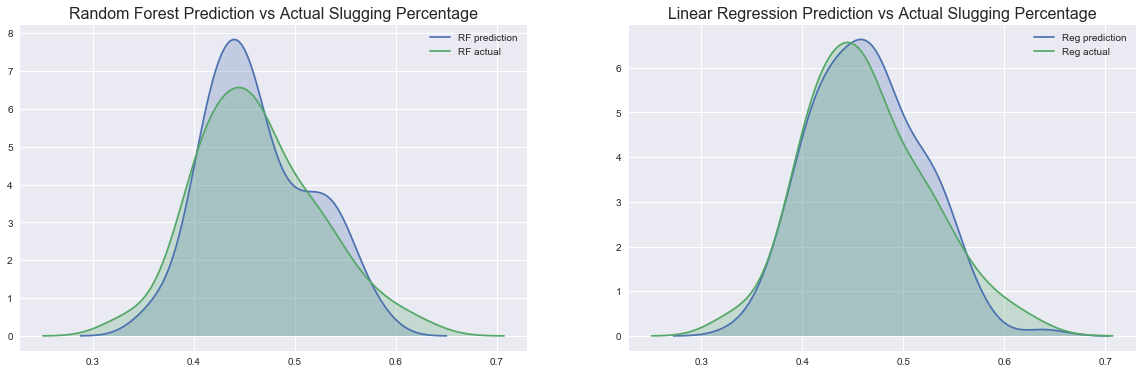

In [8]:
## plot two subplots evaluating both models, comparing the results

f, (ax1, ax2) = plt.subplots(1, 2)
plt.rcParams['figure.figsize'] = (20, 6)

ax1.set_title("Random Forest Prediction vs Actual Slugging Percentage", size = 16)
ax2.set_title("Linear Regression Prediction vs Actual Slugging Percentage", size = 16)


## plot the random forest predictions on actual SLG

sns.kdeplot(results['rf_predict'], shade = True, label = "RF prediction", ax = ax1)
sns.kdeplot(results['actual'], shade = True, label = "RF actual", ax = ax1)


## plot the linear regression predictions on actual SLG

sns.kdeplot(results['reg_predict'], shade = True, label = "Reg prediction", ax = ax2)
sns.kdeplot(results['actual'], shade = True, label = "Reg actual", ax = ax2)

As seen above, both models perform relatively well in predicting full season slugging percentage from our statistics. On the left: the random forest predictions versus the actual statistics. On the right: the linear regression. 

In my opinion, the linear regression with six cross-validations performs better than the random forest. The linear regression model has a similar distribution as the actual slugging percentage, and on inspection, a similar mean and standard deviation. The lack of a smooth distribution, in my opinion, disvalues the random forest model.

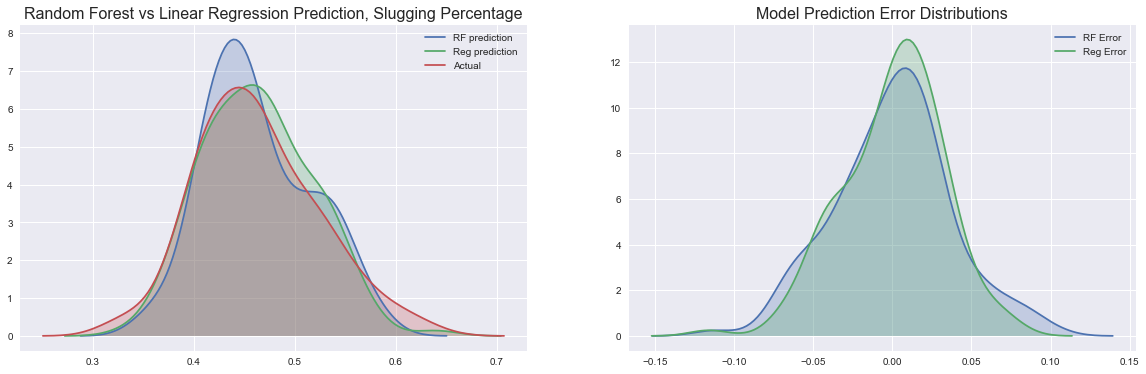

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2)
plt.rcParams['figure.figsize'] = (20, 6)

ax1.set_title("Random Forest vs Linear Regression Prediction, Slugging Percentage", size = 16)
ax2.set_title("Model Prediction Error Distributions", size = 16)

sns.kdeplot(results['rf_predict'], shade = True, label = "RF prediction", ax = ax1)
sns.kdeplot(results['reg_predict'], shade = True, label = "Reg prediction", ax = ax1)
sns.kdeplot(results['actual'], shade = True, label = "Actual", ax = ax1)

sns.kdeplot(results['rf_overpredict'], shade = True, label = "RF Error", ax = ax2)
sns.kdeplot(results['reg_overpredict'], shade = True, label = "Reg Error", ax = ax2)

I combined the above plots to overlay the differences in the distributions (on the left) - the random forest predictions, linear regression predictions and actual slugging percentage overlayed. I also decided to compare the errors from both models (on the right). The linear regression error distribution is centered closer to zero than the random forest distribution, supporing my choice of the linear regression model.

In [6]:
## print mean and standard deviation for both model predictions, errors and actual statistics
## use multiple print statements to keep each subtopic separate


print "\nRandom Forest Error:\n     Mean: ", \
        round(results['rf_overpredict'].mean(), 5), "\n     Std:  ", \
        round(results['rf_overpredict'].std(), 5)
print "Linear Regression Error:\n     Mean: ", \
        round(results['reg_overpredict'].mean(), 5), "\n     Std:  ", \
        round(results['reg_overpredict'].std(), 5)
print "\n"   
print "Random Forest Prediction:\n     Mean: ", \
        round(results['rf_predict'].mean(), 5), "\n     Std:  ", \
        round(results['rf_predict'].std(), 5)
print "Linear Regression Prediction:\n     Mean: ", \
        round(results['reg_predict'].mean(), 5), "\n     Std:  ", \
        round(results['reg_predict'].std(), 5)
print "Actual Full-Season SLG%:\n     Mean: ", \
        round(results['actual'].mean(), 5), "\n     Std:  ", \
        round(results['actual'].std(), 5), "\n"


Random Forest Error:
     Mean:  0.00039 
     Std:   0.0371
Linear Regression Error:
     Mean:  0.00042 
     Std:   0.03204


Random Forest Prediction:
     Mean:  0.46367 
     Std:   0.05237
Linear Regression Prediction:
     Mean:  0.4637 
     Std:   0.05388
Actual Full-Season SLG%:
     Mean:  0.46328 
     Std:   0.06037 



** *note, values may change as the code is rerun, as the kernel is not set* ** 

Comparing means and standard deviations allowed me to compare the actual predicitons themselves - rather than the distribution of predictions. Using the distirbutions alone could lead to improper conclusions, as a distribution plot doesn't discuss how the predictions are distirbuted relative to the matching full season slugging percentage statistics.

    (For example, player A could have a full season SLG% of .400, but is predicted at .300, while player B could have a full-season SLG% of .300, but is predicted at .400. The distribution would perfectly line up with the actual distribution, however the model would perform poorly in implementation.)
     
Using both the mean and standard deviation of errors allowed me to control for the distribution. The linear regression model had both a lower mean and lower distribution than the random forest, implying smaller errors on average in predicting. Comparing the actual results with the predicted statistics continues this - the linear regression model once again outperforms the random forest. Its mean is closer to the actual SLG%. 

### Results

Both models performed well on the aggregate in predicting full-season slugging percentage with half-season statistics given. The linear regression model, however, had a tighter distribution of errors (despite a similar mean). In general, the outlier values in the actual full-season slugging percentage data were cause for the largest prediction errors.

I believe a full-season slugging percentage can be predicted accurately, though I would prefer to include deeper statistics (such as bat speed, launch angle and speed, swing angle through the zone, etc.) to create a more robust model.


** *note, results may change as the code is rerun, as the kernel is not set* ** 


### Linear Regression Predictions & Actual Values:
#### Error Above 50 Slugging-Percentage-Points (.050)

In [33]:
large_error_reg = results[['actual', 'reg_predict', 'reg_overpredict']
                         ][abs(results['reg_overpredict']) > .05]

large_error_reg = large_error_reg.reindex(
    large_error_reg['reg_overpredict'].abs().sort_values(ascending= False).index)


print tabulate(large_error_reg.values, headers = ['Actual SLG%', 'Best Prediction', "Largest Errors"],
               tablefmt = 'psql')

+---------------+-------------------+------------------+
|   Actual SLG% |   Best Prediction |   Largest Errors |
|---------------+-------------------+------------------|
|         0.635 |          0.519195 |       -0.115805  |
|         0.366 |          0.443346 |        0.0773456 |
|         0.488 |          0.415648 |       -0.0723518 |
|         0.477 |          0.545447 |        0.0684474 |
|         0.555 |          0.487824 |       -0.0671764 |
|         0.393 |          0.459215 |        0.066215  |
|         0.481 |          0.544026 |        0.0630263 |
|         0.614 |          0.551718 |       -0.0622821 |
|         0.583 |          0.522282 |       -0.0607183 |
|         0.462 |          0.403878 |       -0.0581217 |
|         0.42  |          0.472294 |        0.0522943 |
|         0.487 |          0.538491 |        0.0514913 |
|         0.466 |          0.415432 |       -0.0505675 |
+---------------+-------------------+------------------+
